# **SETUP**

## Libraries

In [94]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

## Custom functions

In [96]:
def custom_getattr(obj, include_methods=False):
  attributes = [a for a in dir(obj) if not a.startswith('_')]
  if not include_methods:
    attributes = [a for a in attributes if not callable(getattr(obj, a))]
  return attributes


def custom_getmethods(obj):
  attributes = custom_getattr(obj, include_methods=True)
  methods = [a for a in attributes if callable(getattr(obj, a))]
  return methods


def print_class_attr(obj):
  try:
    object_name = obj.__name__
  except AttributeError:
    object_name = obj.__class__.__name__

  print(f"""
  {object_name} methods: {custom_getmethods(obj)}
  {object_name} attributes: {custom_getattr(obj)}
  """)

## Load dataset

In [131]:
df = sns.load_dataset('flights')
df.index = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%b')
df.drop(columns=['year','month'], inplace=True)
df.index.name = 'date'
display(df)

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# **Inspect Time Series**

In [174]:
rc_params = {'figure.figsize':(16,9), 'axes.labelpad':15, 'axes.labelweight':'normal', 'axes.titlepad':20, 'axes.titlesize':'large', 'axes.titleweight':'bold'}
sns.set_theme(context='talk', font_scale=.75, rc=rc_params)

## **EDA Plots**

### Month plot

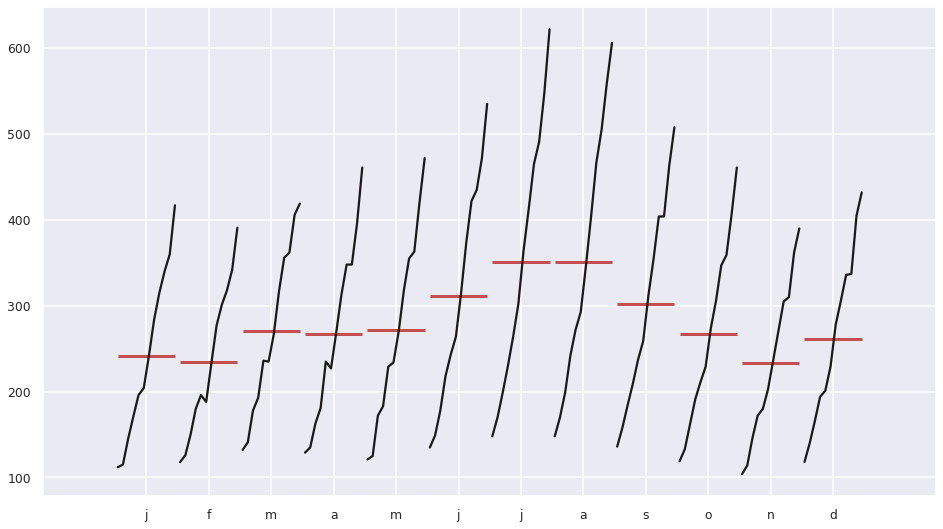

In [132]:
month_plot(df);

### Annual plot

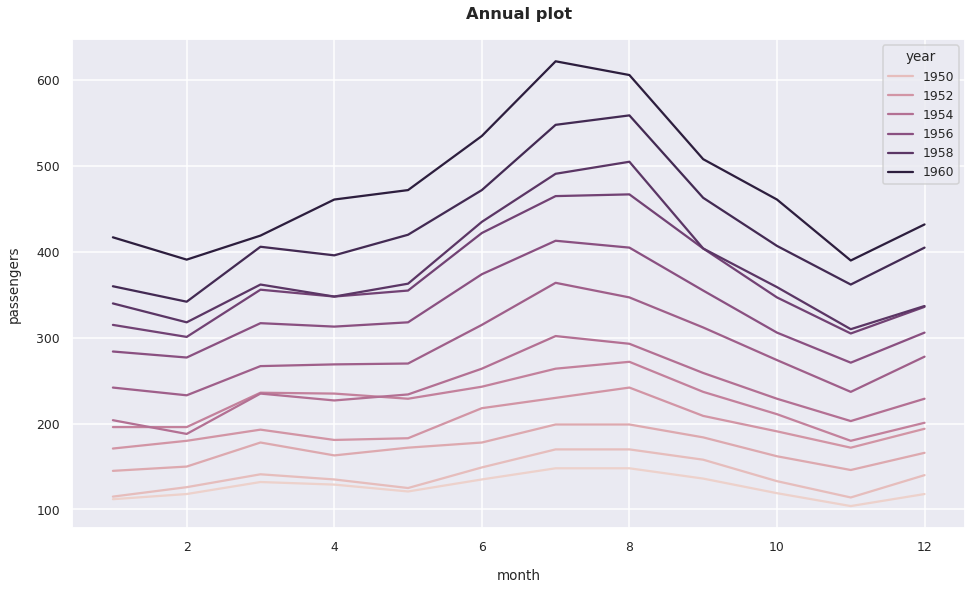

In [175]:
df_plot = df.assign(year = lambda x: x.index.year, month = lambda x: x.index.month)

sns.lineplot(
    data=df_plot,
    x='month', y='passengers', hue='year'
)
plt.title('Annual plot')
plt.show()

### Normalized annual plot

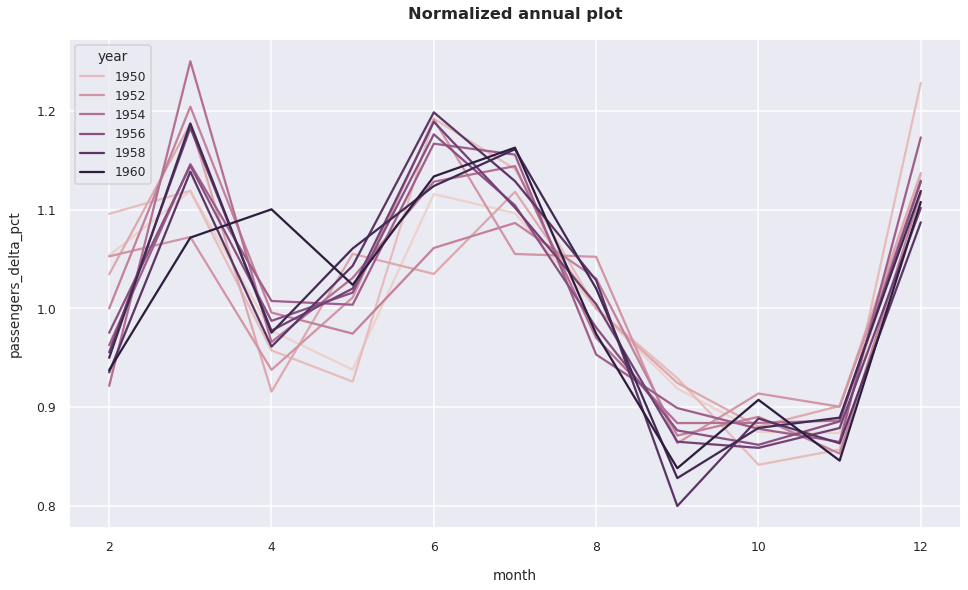

In [176]:
df_plot['passengers_delta_pct'] = df_plot.groupby('year')['passengers'].transform(lambda subdf: subdf.rolling(2).apply(lambda x: x[-1]/x[0]))

sns.lineplot(
    data=df_plot,
    x='month', y='passengers_delta_pct', hue='year'
)
plt.title('Normalized annual plot')
plt.show()

### Normalized plot

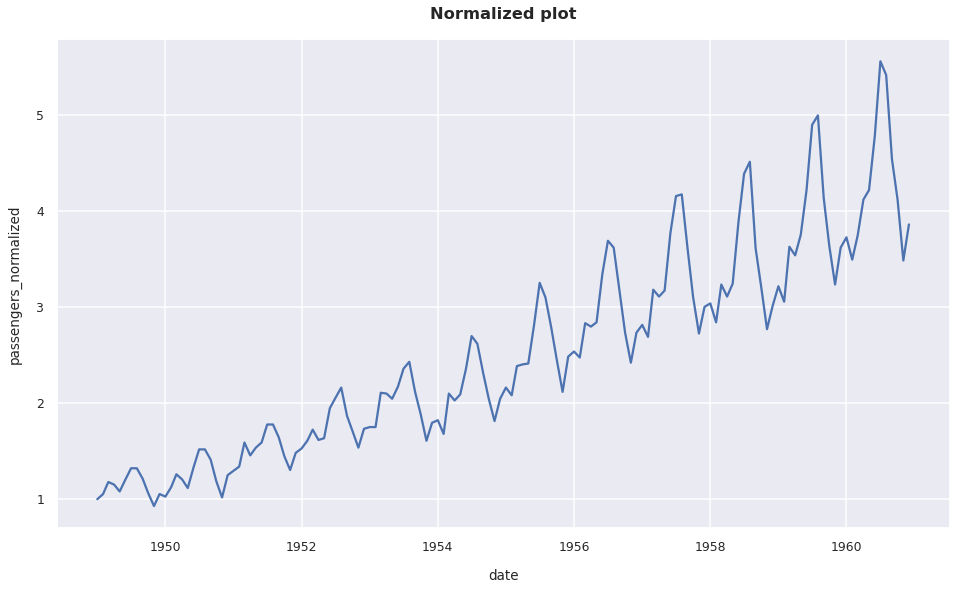

In [184]:
df_plot = df.assign(passengers_normalized = df.passengers.div(df.passengers[0]))

sns.lineplot(data=df_plot, x='date', y='passengers_normalized')
plt.title('Normalized plot')
plt.show()

## **Time series decomposition**

In [99]:
decomposition = seasonal_decompose(df, model='additive')
print_class_attr(decomposition)


  DecomposeResult attributes: ['nobs', 'observed', 'resid', 'seasonal', 'trend', 'weights']
  DecomposeResult methods: ['plot']
  


In [106]:
@interact(model=['additive','multiplicative'])
def plot_decomposition(model):
  decomposition = seasonal_decompose(df, model=model)
  decomposition.plot()
  plt.suptitle(f'model: {model}', weight='bold', size='x-large', y=1.05)
  plt.show()

interactive(children=(Dropdown(description='model', options=('additive', 'multiplicative'), value='additive'),…

## **Autocorrelation**

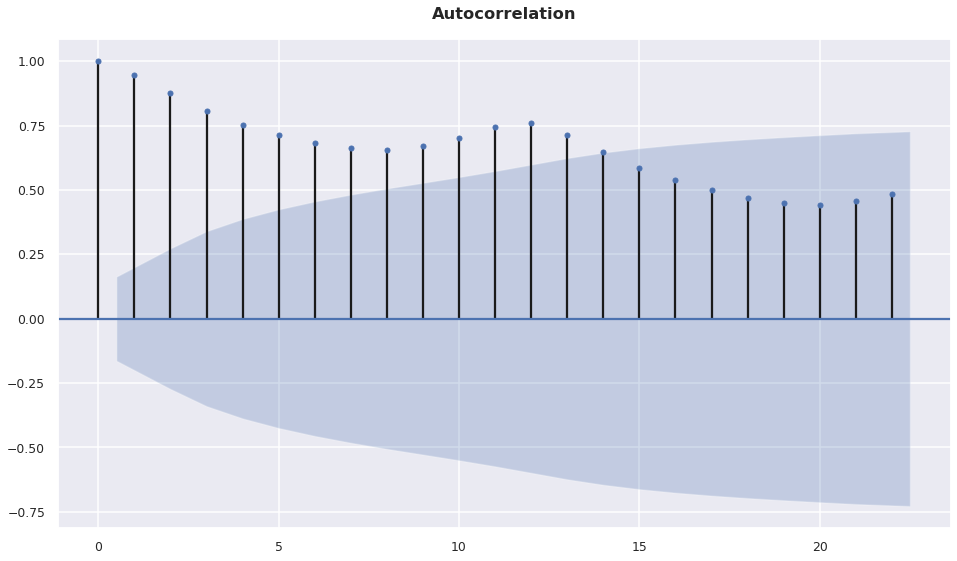

In [144]:
plot_acf(df);

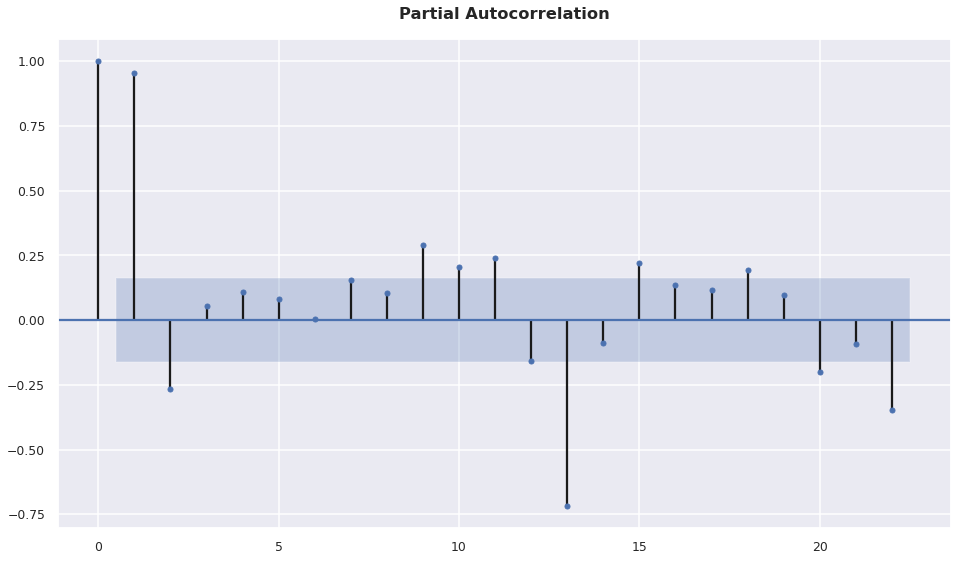

In [145]:
plot_pacf(df);